In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random,time,math

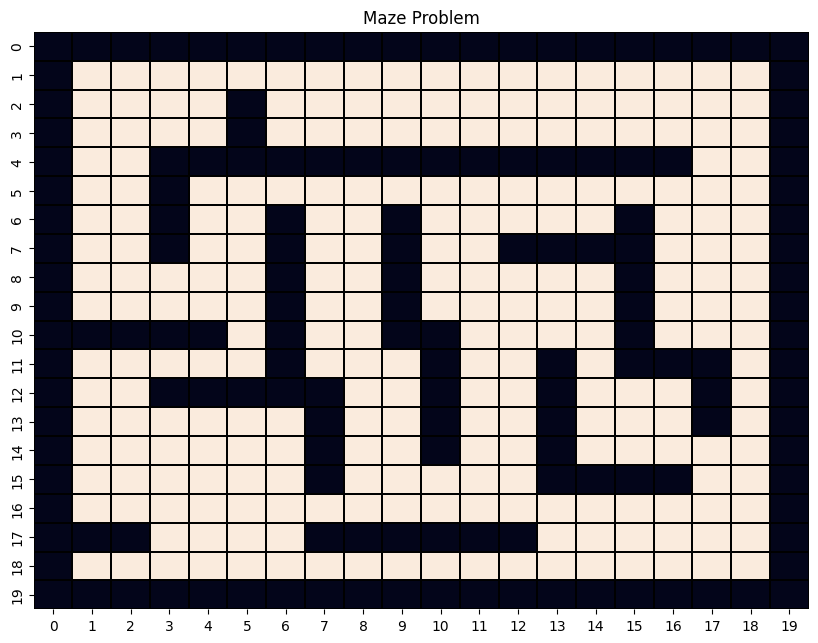

In [2]:
State_Matrix = np.array([[255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
              [255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,255],
              [255, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255],
              [255, 0, 0, 255, 255, 255, 255,255,255,255,255,255,255,255,255, 255, 255, 0, 0, 255],
              [255, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,255],
              [255, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 255, 0, 0, 0, 255],
              [255, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 255, 255, 255, 255, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 255, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 255, 0, 0, 0,255],
              [255, 255, 255, 255, 255, 0, 255, 0, 0, 255, 255, 0, 0, 0, 0, 255, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 255, 0,0 , 0, 255, 0, 0, 255, 0, 255, 255, 255, 0, 255],
              [255, 0, 0, 255, 255, 255, 255, 255,0,0, 255, 0, 0, 255, 0, 0, 0, 255, 0, 255],
              [255, 0, 0, 0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 0, 255, 0,255],
              [255, 0, 0, 0, 0, 0, 0, 255, 0, 0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 255, 255, 255, 255, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255],
              [255, 255, 255, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 255],
              [255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255],
              [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255]])


plt.subplots(figsize=(10,7.5))
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
plt.title('Maze Problem')
plt.show()

In [3]:
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state):

    for i in range(len(oil_states)):    # Adding red oil blocks
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='red', edgecolor='red', lw=0.25))

    for i in range(len(bump_states)):   # Adding salmon bump blocks
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='lightsalmon', edgecolor='lightsalmon', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='lightblue', edgecolor='lightblue', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='lightgreen', edgecolor='lightgreen', lw=0.25))

In [4]:
def value_function_plot(x_ans,p,gamma):
  plt.subplots(figsize=(18,12))
  heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, annot= x_ans, linecolor='black',cbar= False, cmap= 'rocket_r')

  coloring_blocks(heatmap, oil_states= Oil,
                  bump_states= Bumps,
                  start_state= Start,
                  end_state= Finish)

  plt.title('Maze Problem: Optimal Value Function with p = ' + str(p) + ' and gamma = ' + str(gamma))
  plt.show()

In [5]:
def policy_plot(Pi_optimal,p,gamma):
  Pi_show = np.chararray((20,20))

  for i in range(18):
    for j in range(18):
      action = Pi_optimal[i,j]

      if action == 0 :    #Left
        Pi_show[i+1,j+1] ='L'
      elif action == 1 :  #Up
        Pi_show[i+1,j+1] = 'U'
      elif action == 2 :  #Right
        Pi_show[i+1,j+1] = 'R'
      elif action == 3:   #Down
        Pi_show[i+1,j+1] = 'D'

      if State_Matrix[i,j] == 255:
        Pi_show[i,j] = ' '

  Pi_show = np.array(Pi_show,dtype = str)
  plt.subplots(figsize=(10,7.5))
  heatmap = sns.heatmap(State_Matrix, fmt="s", linewidths=0.25, annot = Pi_show, linecolor='black',cbar= False, cmap= 'rocket_r')

  coloring_blocks(heatmap, oil_states= Oil,
                  bump_states= Bumps,
                  start_state= Start,
                  end_state= Finish)

  plt.title('Maze Problem: Optimal Policy with p = ' + str(p) +  ' and gamma = ' + str(gamma))
  plt.show()

In [6]:
Bumps = [(1,11),(1,12),(2,1),(2,2),(2,3),(14,1),(14,2),(16,7),(15,17),(15,18),(12,11),(12,12),
                             (7,10),(7,11),(5,9),(5,17),(6,17),(7,17),(8,17),(5,1),(7,2)]

Oil = [(4,2),(5,6),(2,8),(2,16),(18,7),(17,14),(17,17),(16,10),(15,10),(10,18)]

Start = (15,4)
Finish = (3,13)

Goal = [(3,13)]

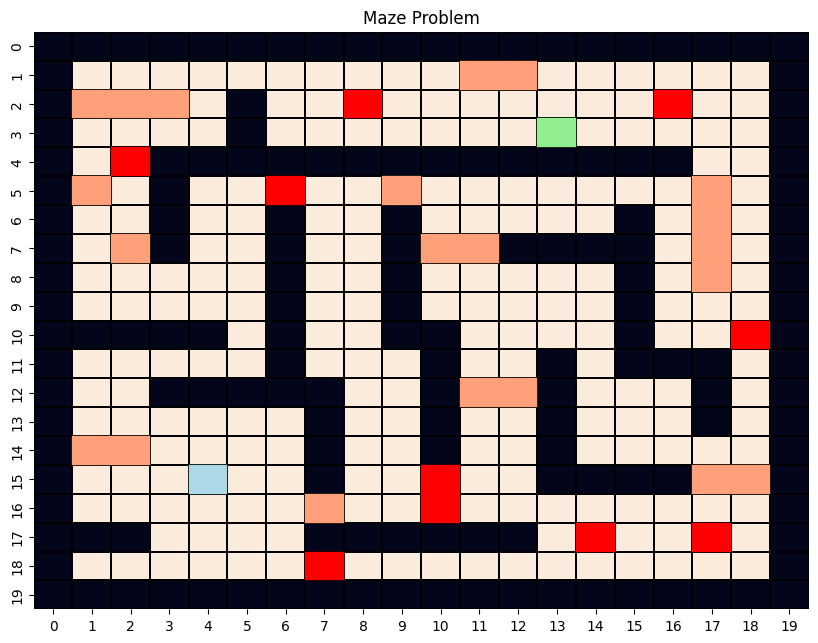

In [7]:
plt.subplots(figsize=(10,7.5))
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',cbar= False, cmap= 'rocket_r')

coloring_blocks(heatmap, oil_states= Oil,
                bump_states= Bumps,
                start_state= Start,
                end_state= Finish)

plt.title('Maze Problem')
plt.show()

In [8]:
#print(get_next_state([3,14],0))

In [9]:
def Path_Planning(Pi):
  path_x = []
  path_y = []
  all_action = []

  path_x.append(15)
  path_y.append(4)

  i, j = 14, 3
  action = Pi[14,3]
  all_action.append(action)

  clock = 0

  while True:

    if action == 0:
      path_x.append(i+1)
      j-=1
      path_y.append(j+1)

    elif action == 1:
      i-=1
      path_x.append(i+1)
      path_y.append(j+1)

    elif action == 2:
      path_x.append(i+1)
      j+=1
      path_y.append(j+1)

    elif action == 3:
      i+=1
      path_x.append(i+1)
      path_y.append(j+1)

    else:
      continue

    action = Pi[i,j]
    all_action.append(action)

    clock +=1

    if (i==2 and j==12):
      #break
      return all_action, path_x, path_y, True

    elif clock>50:
      return all_action, path_x, path_y, False


  #return all_action, path_x, path_y

In [10]:
def Get_path(Pi,p,gamma):

  all_action, path_x, path_y, Is_path_there = Path_Planning(Pi)

  if Is_path_there == False:
    print('No Path Present for these specifications!')


  else:
    path = np.vstack((path_x,path_y,all_action))
    path = (np.rint(path)).astype(int)


    plt.subplots(figsize=(10,7.5))
    heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',cbar= False, cmap= 'rocket_r')

    coloring_blocks(heatmap, oil_states= Oil,
                    bump_states= Bumps,
                    start_state= Start,
                    end_state= Finish)


    for i in range(path.shape[1]-1):
        x = path[0][i] # x_coordinate
        c = path[1][i] # y_coordinate
        direction = path[2][i] # action

        if direction == 0:
            plt.arrow(c + 0.5, x + 0.5, -0.8, 0, width=0.08, color='black')  # Left

        if direction == 1:
            plt.arrow(c + 0.5, x + 0.5, 0, -0.8, width=0.08, color='black')  # Up

        if direction == 2:
            plt.arrow(c + 0.5, x + 0.5, 0.8, 0, width=0.08, color='black')   # Right

        if direction == 3:
            plt.arrow(c + 0.5, x + 0.5, 0, 0.8, width=0.08, color='black')  # Down

    # Show plot
    plt.title('Maze Problem: Optimal Path with alpha = ' + str(p) +  ' and epsilon = ' + str(gamma))
    plt.show()

In [11]:
def get_next_state(current_state,action,p):

  i = current_state[0]
  j = current_state[1]
  R, ns_x, ns_y = 0, 0, 0

  test = random.random()

  if test < p:
    all_actions = np.array([0,1,2,3])
    new_array = np.delete(all_actions, np.where(all_actions == action))
    action = random.choice(new_array)


  #Left desired
  if action == 0:

    if (i+1,j-1+1) in Oil:
      R = -6
      ns_x = i
      ns_y = j-1

    elif (i+1,j-1+1) in Bumps:
      R = -1-10
      ns_x = i
      ns_y = j-1

    elif (i+1,j-1+1) in Goal:
      R = -1+200
      ns_x = i
      ns_y = j-1

    elif State_Matrix[i+1,j-1+1] == 255:
      R = -1
      ns_x = i
      ns_y = j

    else:
      R = -1
      ns_x = i
      ns_y = j-1

  #Up action taken
  elif action == 1:

    if (i-1+1,j+1) in Oil:
      R = -6
      ns_x = i-1
      ns_y = j

    elif (i-1+1,j+1) in Bumps:
      R = -11
      ns_x = i-1
      ns_y = j

    elif (i-1+1,j+1) in Goal:
      R = -1+200
      ns_x = i-1
      ns_y = j

    elif State_Matrix[i-1+1,j+1] == 255:
      R = -1
      ns_x = i
      ns_y = j

    else:
      R = -1
      ns_x = i-1
      ns_y = j

  #Right action taken
  elif action == 2:

    if (i+1,j+1+1) in Oil:
      R = -6
      ns_x = i
      ns_y = j+1

    elif (i+1,j+1+1) in Bumps:
      R = -11
      ns_x = i
      ns_y = j+1

    elif (i+1,j+1+1) in Goal:
      R = -1+200
      ns_x = i
      ns_y = j+1

    elif State_Matrix[i+1,j+1+1] == 255:
      R = -1
      ns_x = i
      ns_y = j

    else:
      R = -1
      ns_x = i
      ns_y = j+1

  #Down action taken
  elif action == 3:

    if (i+1+1,j+1) in Oil:
      R = -6
      ns_x = i+1
      ns_y = j

    elif (i+1+1,j+1) in Bumps:
      R = -11
      ns_x = i+1
      ns_y = j

    elif (i+1+1,j+1) in Goal:
      R = -1 + 200
      ns_x = i+1
      ns_y = j

    elif State_Matrix[i+1+1,j+1] == 255:
      R = -1
      ns_x = i
      ns_y = j

    else:
      R = -1
      ns_x = i+1
      ns_y = j

  else:
    pass

  next_state = [ns_x, ns_y]

  return R, next_state

In [12]:
def choose_action(Q,current_state):

    zz = random.random()
    if zz < epsilon:
        action = np.random.randint(num_actions)

    else:
      if len(np.unique(Q[current_state[0],current_state[1]])) == 4:
        action = np.argmax(Q[current_state[0],current_state[1]])
      else:
        tt = np.where(Q[current_state[0],current_state[1]] == np.amax(Q[current_state[0],current_state[1]]))[0]
        action = random.choice(tt)

    return action

In [13]:
#print(choose_action(np.zeros((18,18,4)),[15,3]))

In [14]:
def get_policy(Q):
  ans = np.zeros((18,18))

  for i in range(18):
    for j in range(18):
      temp = np.array(Q[i,j])

      if len(np.unique(temp)) == 4:
        aa = np.argmax(temp)

      else:
        tt = np.where(temp == np.amax(temp))[0]
        aa = random.choice(tt)

      ans[i,j] = aa

  return ans

In [15]:
def policy_deter(arr):
  ans = np.chararray((20,20))

  for i in range(18):
    for j in range(18):

      if arr[i][j] == 0:
        ans[i+1,j+1] = 'L'
      elif arr[i][j] == 1:
        ans[i+1,j+1] = 'U'
      elif arr[i][j] == 2:
        ans[i+1,j+1] = 'R'
      elif arr[i][j] == 3:
        ans[i+1,j+1] = 'D'
      elif State_Matrix[i+1,j+1] == 255:
        ans[i+1,j+1] = ' '
      else:
        pass

  ans = np.array(ans,dtype = str)
  return ans

In [16]:
def policy_plot(Pi_optimal,alpha,epsilon):
  Pi_show = np.chararray((20,20))

  for i in range(18):
    for j in range(18):
      action = Pi_optimal[i,j]

      if action == 0 :    #Left
        Pi_show[i+1,j+1] ='L'
      elif action == 1 :  #Up
        Pi_show[i+1,j+1] = 'U'
      elif action == 2 :  #Right
        Pi_show[i+1,j+1] = 'R'
      elif action == 3:   #Down
        Pi_show[i+1,j+1] = 'D'

      if State_Matrix[i,j] == 255:
        Pi_show[i,j] = ' '

  Pi_show = np.array(Pi_show,dtype = str)
  plt.subplots(figsize=(10,7.5))
  heatmap = sns.heatmap(State_Matrix, fmt="s", linewidths=0.25, annot = Pi_show, linecolor='black',cbar= False, cmap= 'rocket_r')

  coloring_blocks(heatmap, oil_states= Oil,
                  bump_states= Bumps,
                  start_state= Start,
                  end_state= Finish)

  plt.title('Maze Problem: Optimal Policy with alpha = ' + str(alpha) +  ' and epsilon = ' + str(epsilon))
  plt.show()

In [17]:
def reward_array(test):
  test = np.array(test,dtype = float)
  for i in range(test.shape[0]):

    reward = 0
    for j in range(test.shape[1]):

      reward += test[i][j]
      test[i][j] = reward/(j+1)

  f = np.array(np.mean(test,axis=0))
  return f

In [18]:
p = 0.02
gamma = 0.95
alpha = 0.3
epsilon = 0.1

num_states = 324
num_actions = 4

num_runs = 10
num_episodes = 1000
episode_length = 1000

#Q Learning

Run:  1



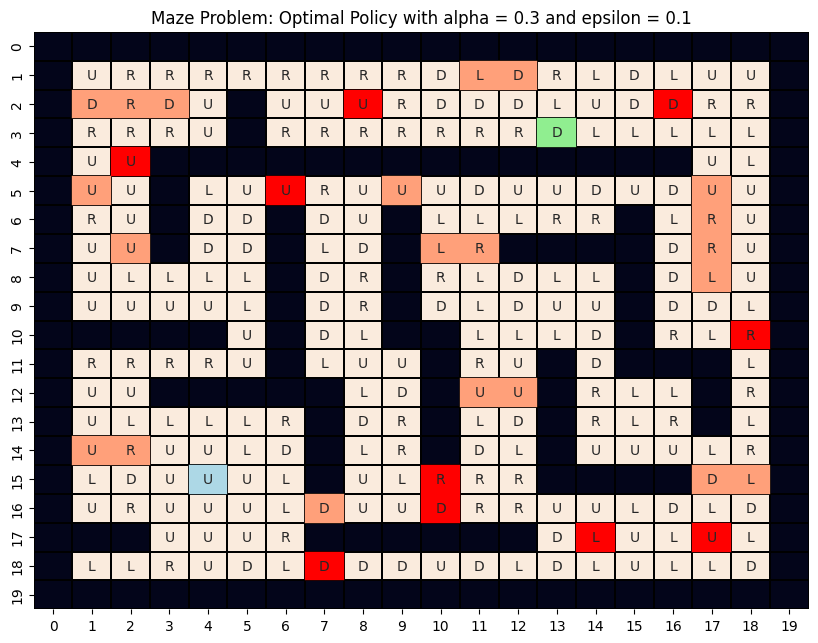

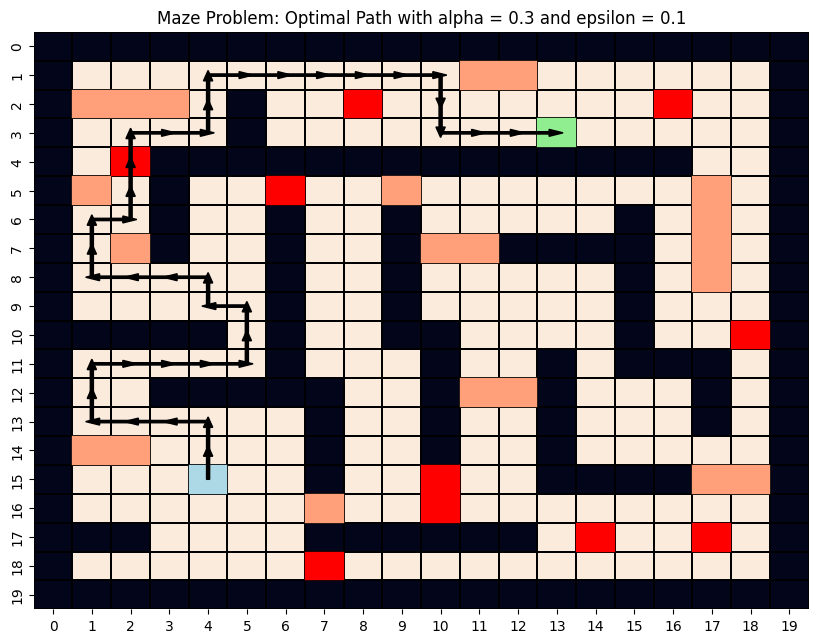

Run:  2



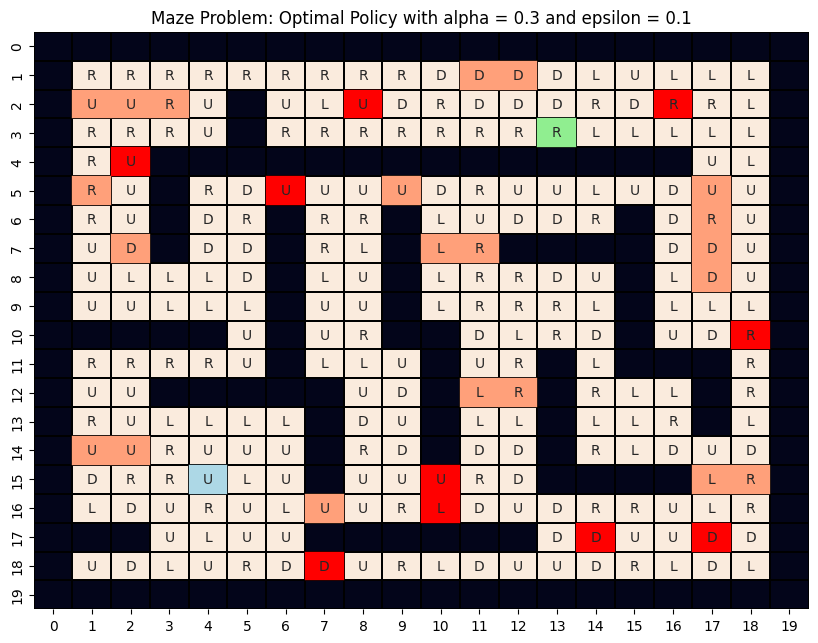

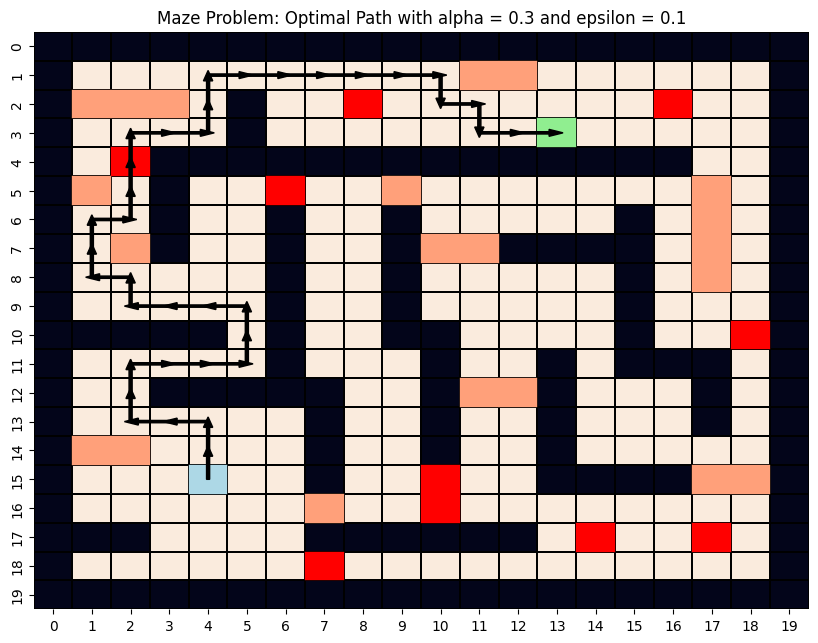

Run:  3



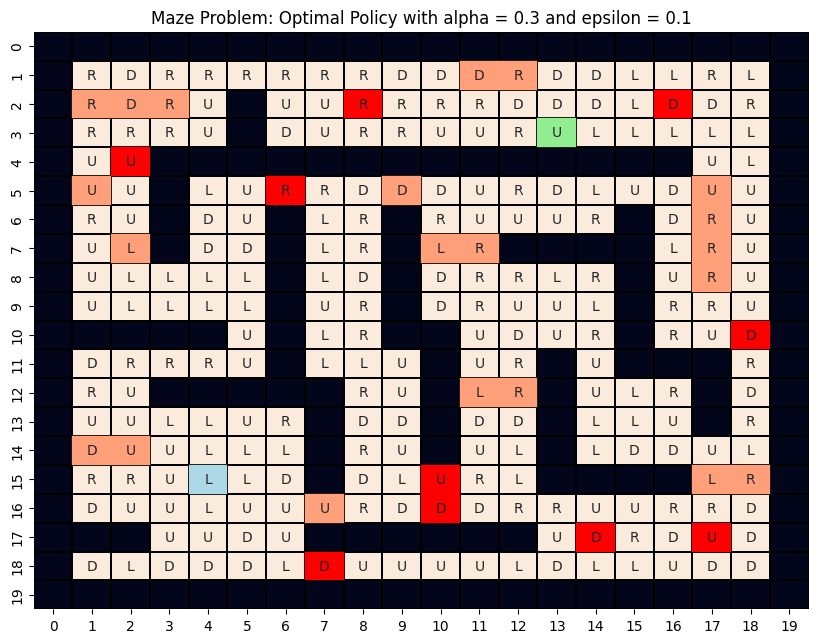

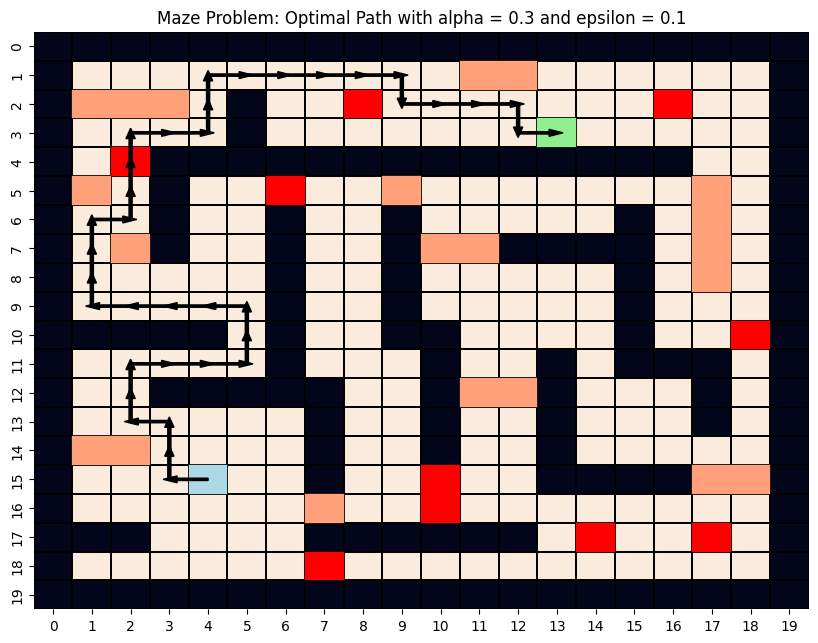

Run:  4



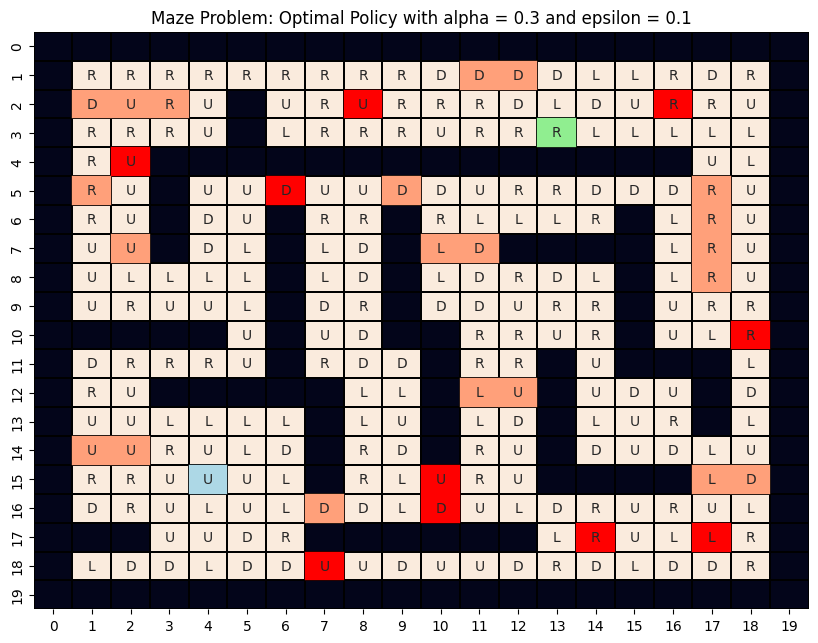

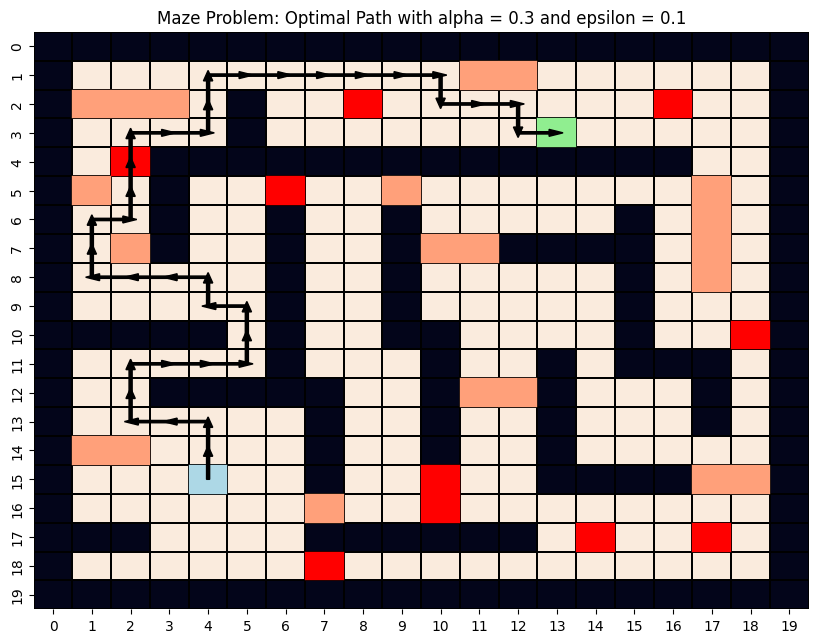

Run:  5



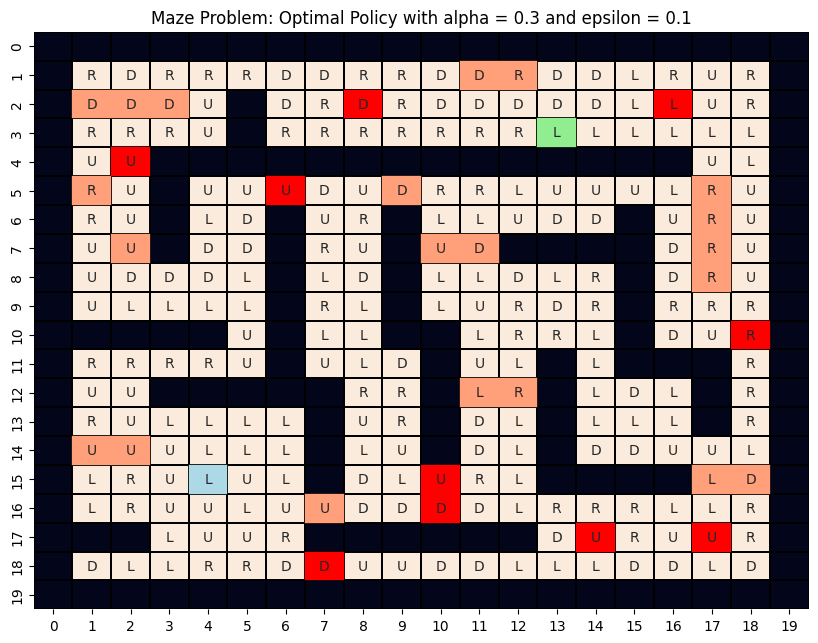

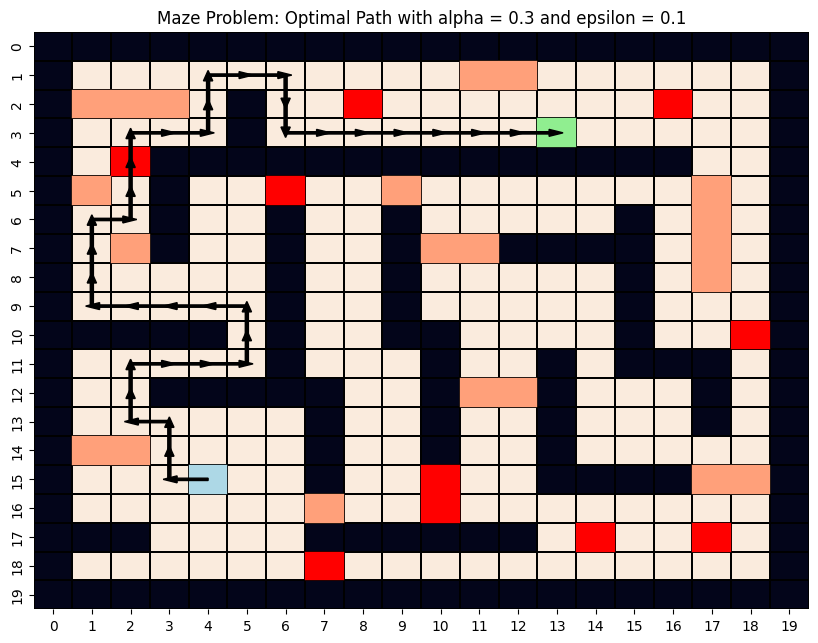

Run:  6



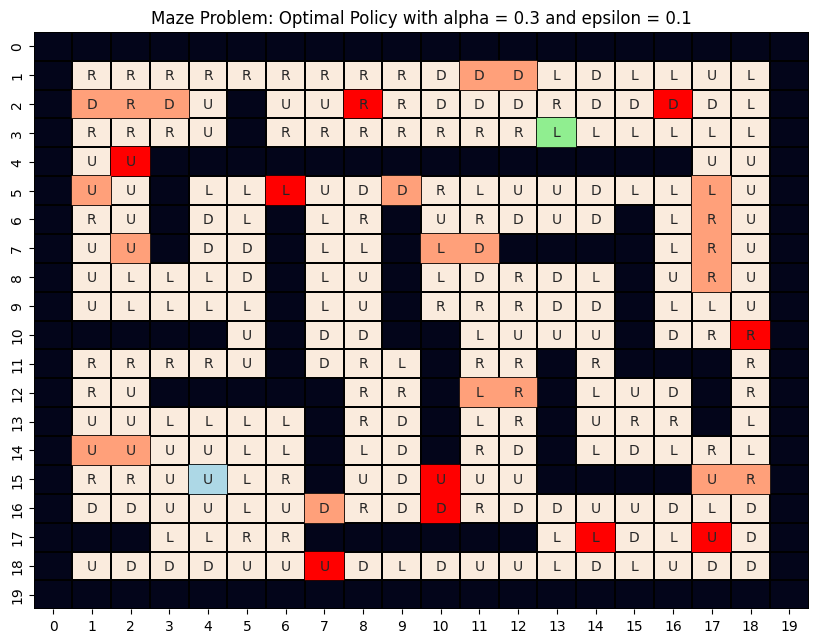

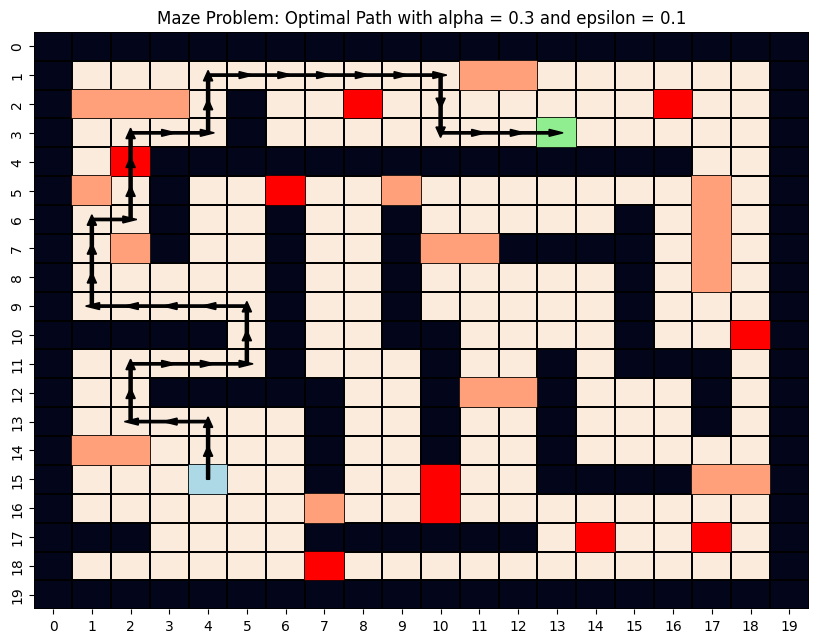

Run:  7



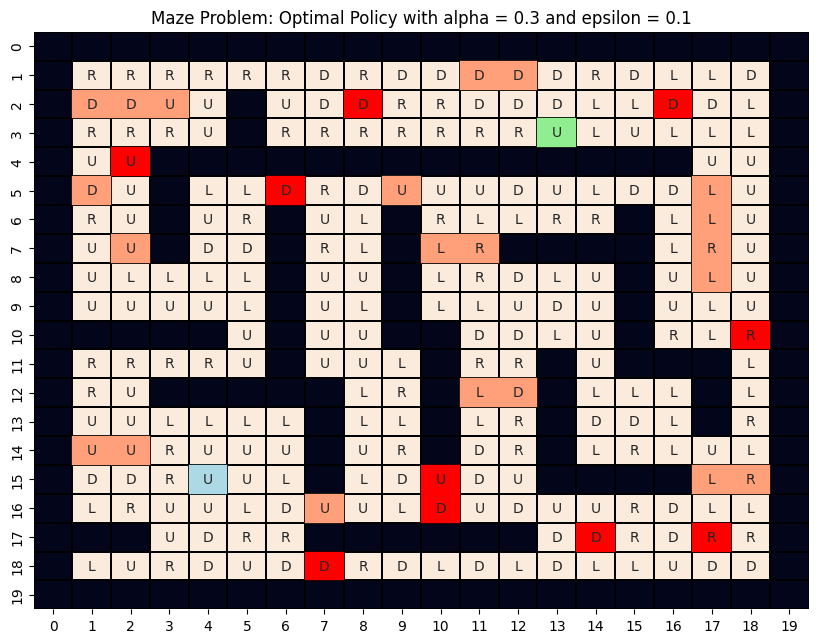

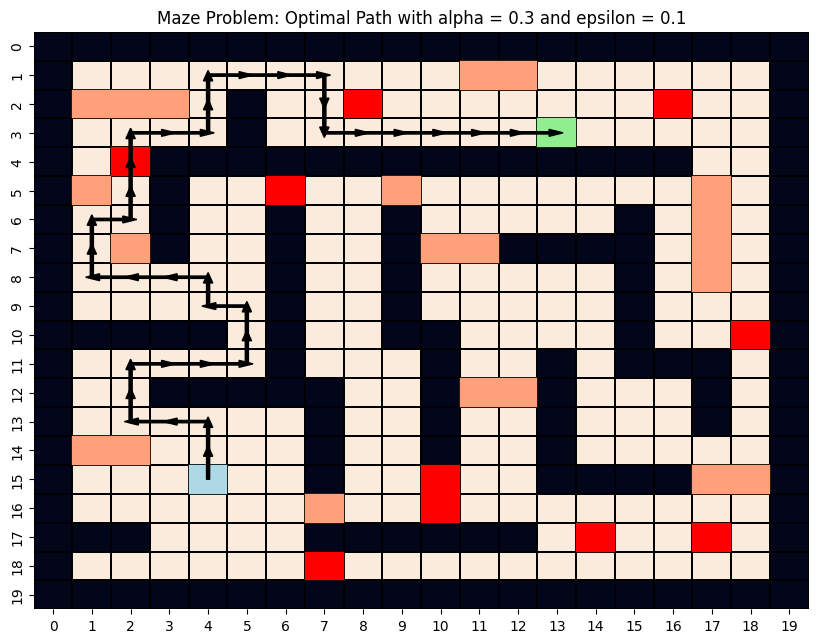

Run:  8



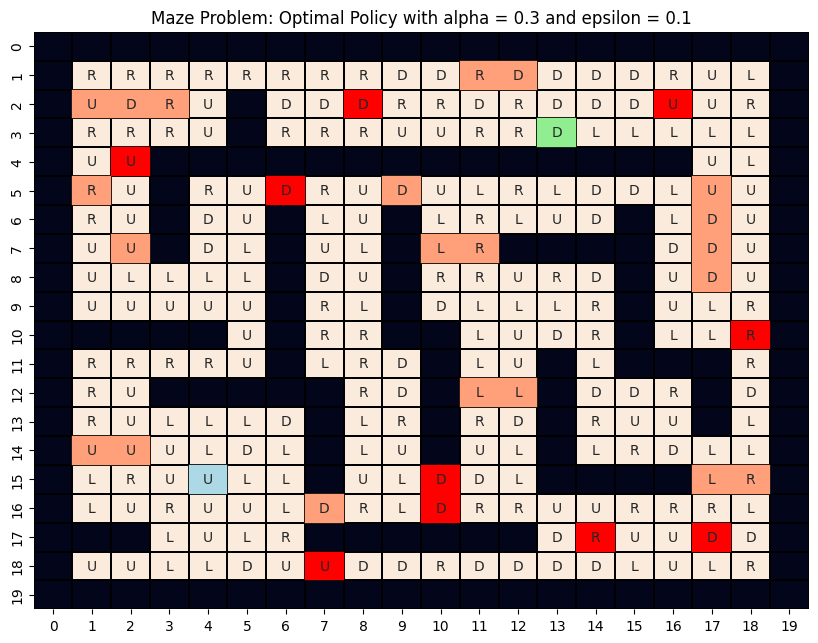

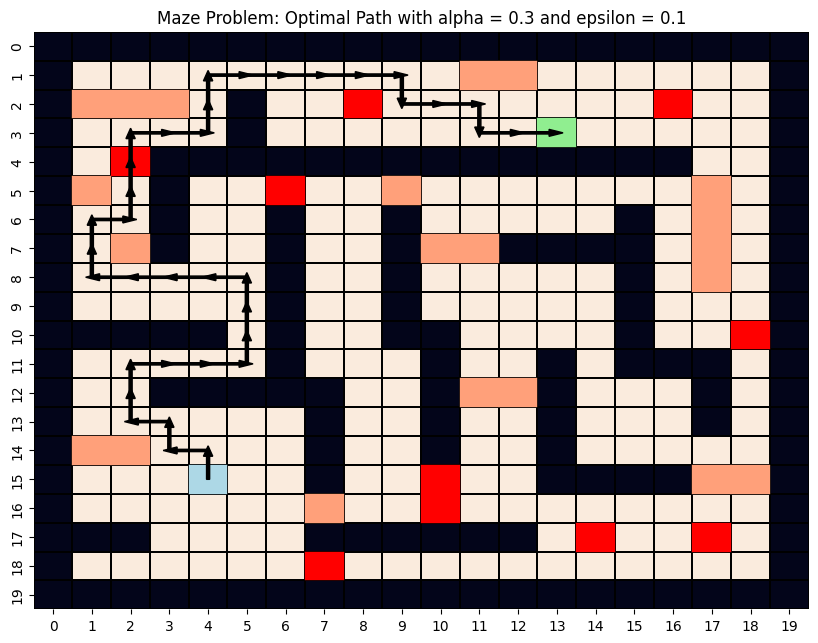

Run:  9



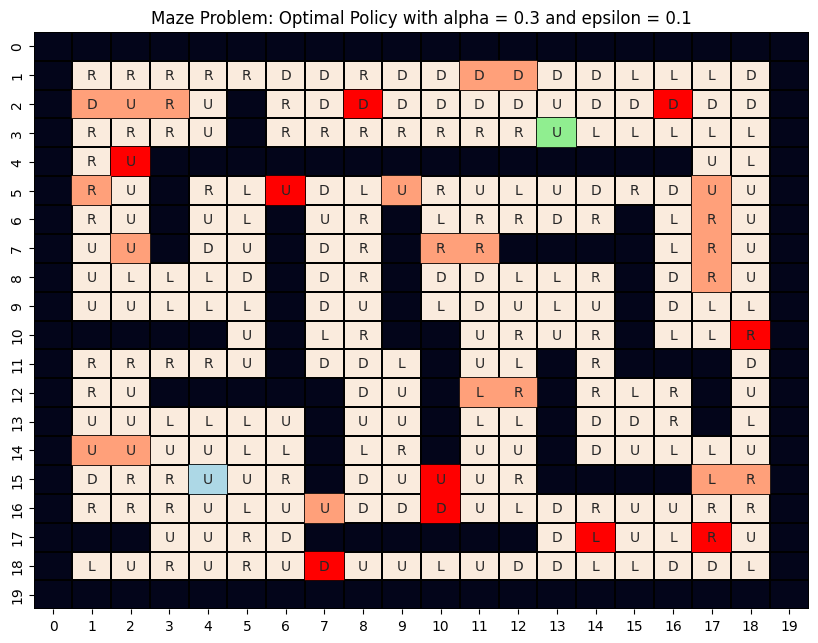

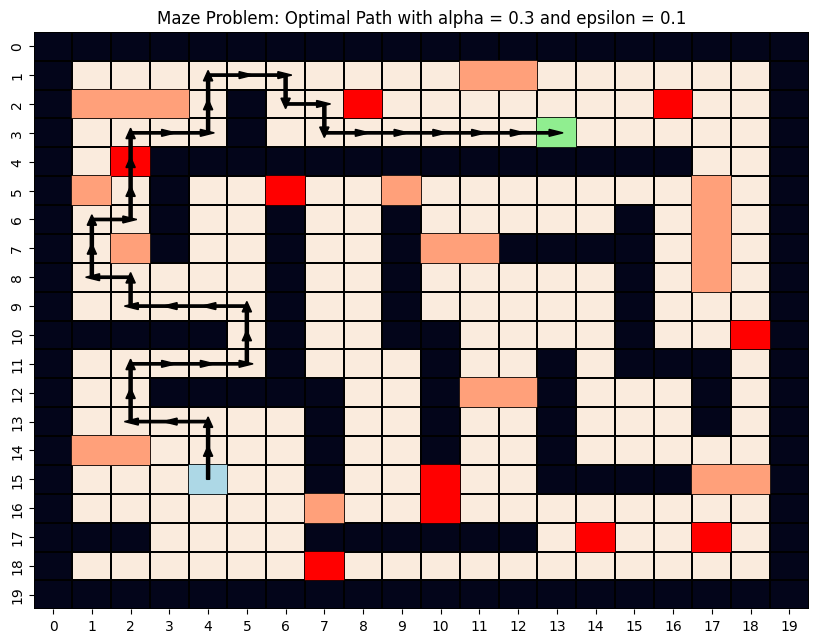

Run:  10



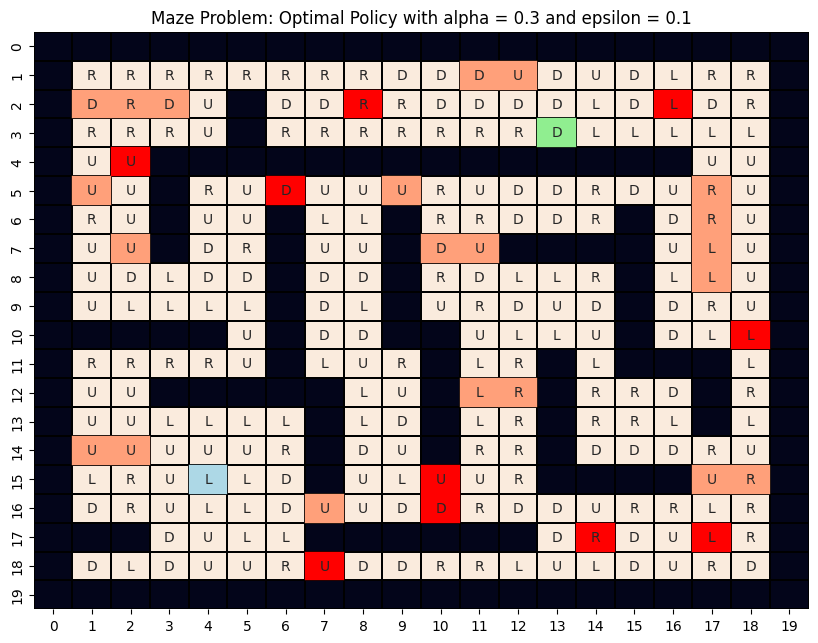

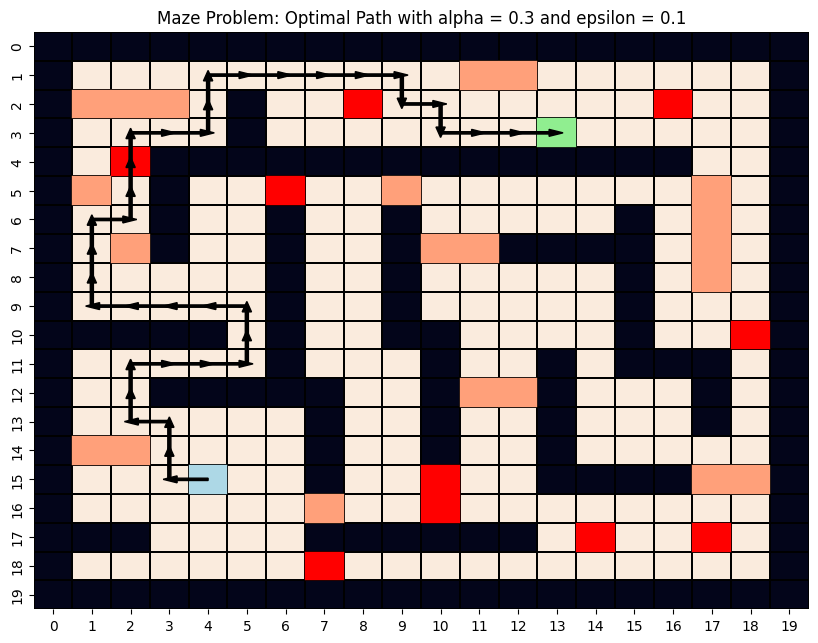

In [19]:
Q = np.zeros((18,18,num_actions))
R = np.zeros((num_runs,num_episodes))

maze_policies = np.zeros((18,18))  #Left 0 / Up 1 / Right 2 / Down 3

start = [14,3]
end = [2,12]

for run in range(num_runs):

    Q = np.zeros((18,18,num_actions))
    maze_policies = np.zeros((18,18))

    for episode in range(num_episodes):

        current_state = start
        episode_reward = 0
        #step = 0

        for step in range(episode_length):

            action = choose_action(Q,current_state)

            reward , next_state = get_next_state(current_state,action,p)  #0:Left 1:Up 2:Right 3:Down

            episode_reward += reward

            Q[current_state[0],current_state[1],action] +=  alpha * (reward + (gamma * np.max(Q[next_state[0],next_state[1]]))
                                                            - Q[current_state[0],current_state[1],action])


            if (next_state[0] == end[0]) and (next_state[1] == end[1]):
              break

            current_state = next_state

        R[run,episode] =  episode_reward/(step+1)

    maze_policies = get_policy(Q)


    print('Run: ',run+1)
    print()
    policy_plot(maze_policies,alpha,epsilon)
    print()

    Get_path(maze_policies,alpha,epsilon)

R_final_QLearning = reward_array(R)

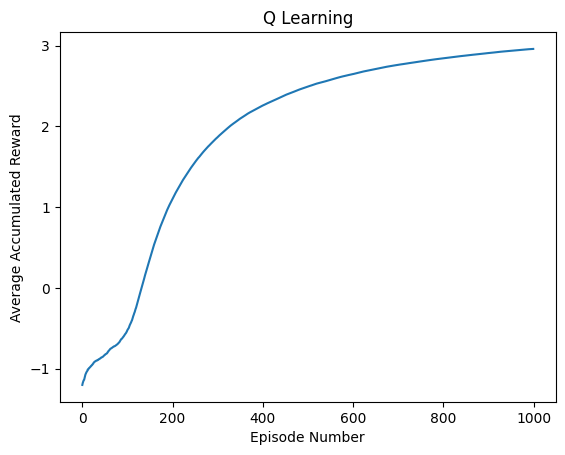

In [20]:
#Output Graph
plt.plot(range(num_episodes),R_final_QLearning)
plt.ylabel('Average Accumulated Reward')
plt.xlabel('Episode Number')
plt.title('Q Learning')
plt.show()

# SARSA

Run:  1


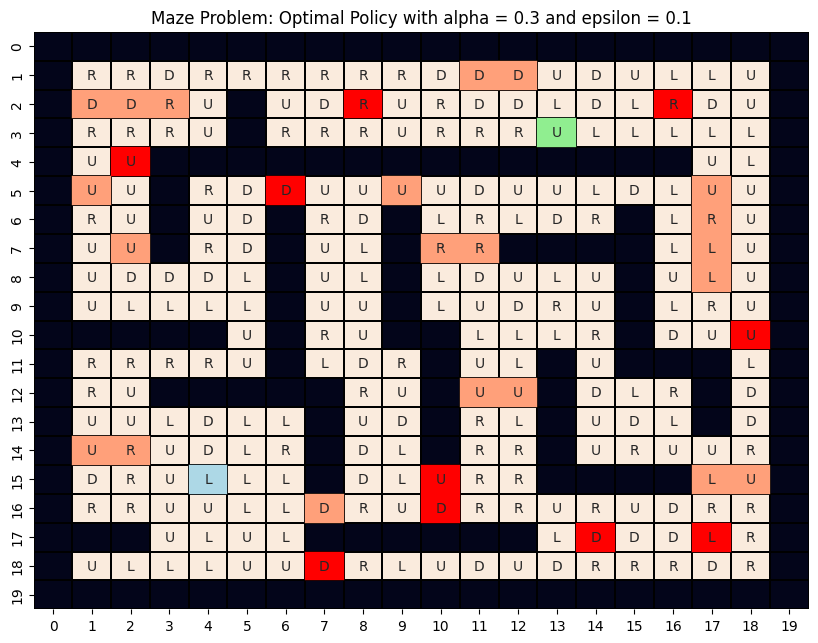

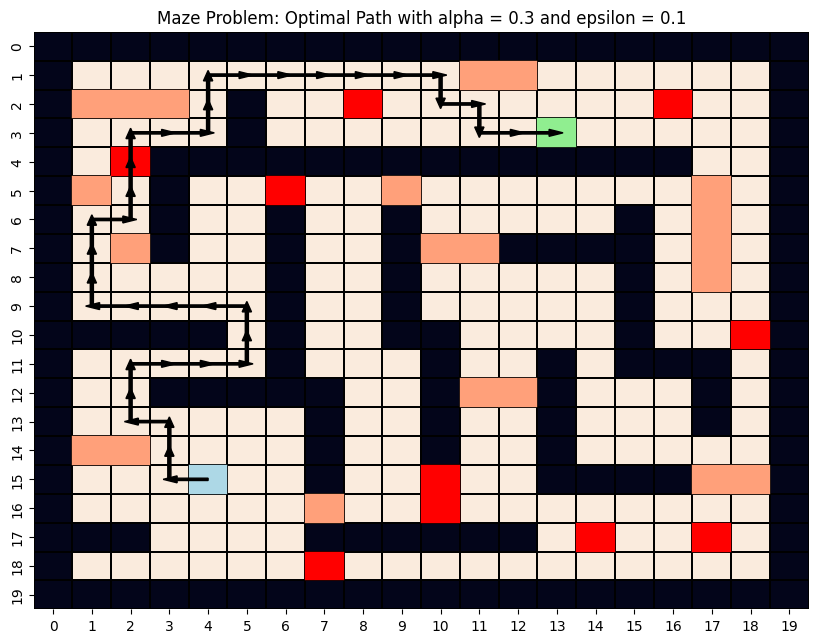

Run:  2


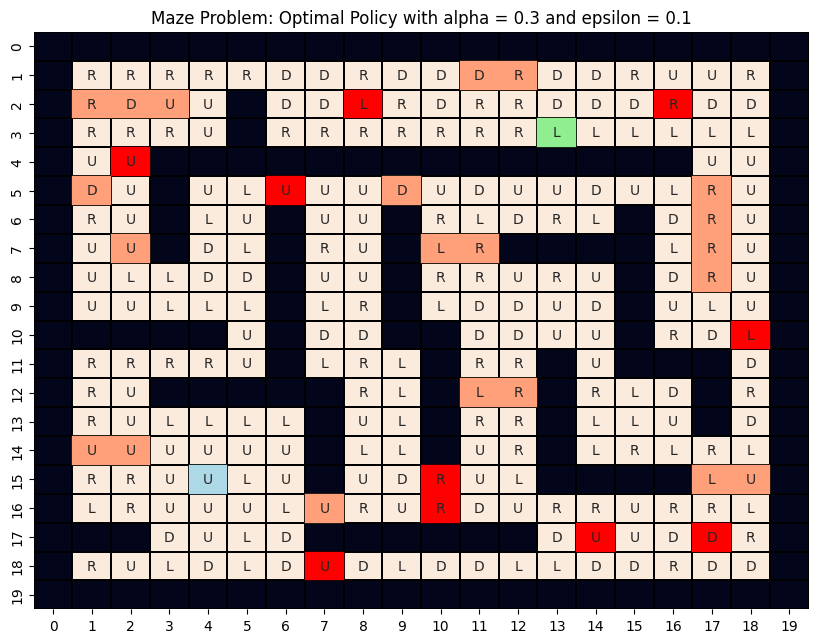

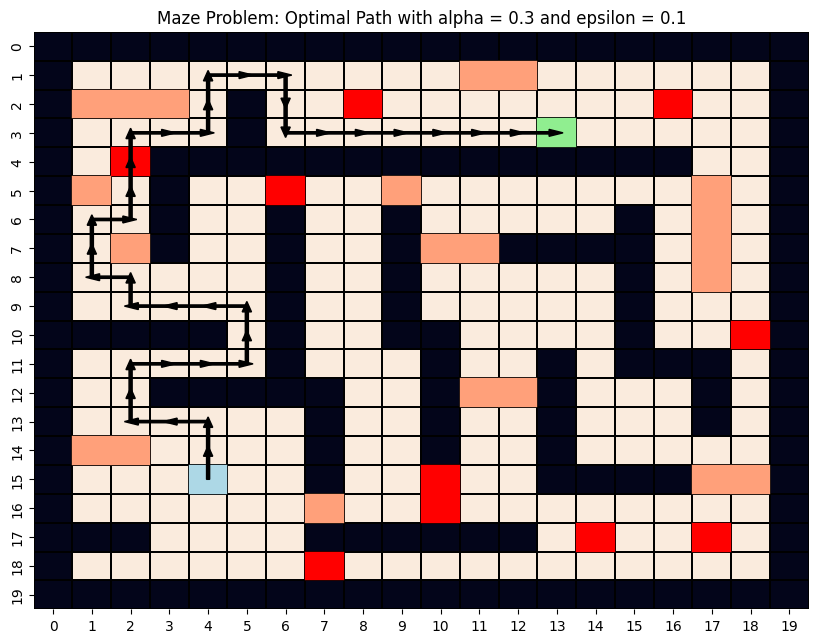

Run:  3


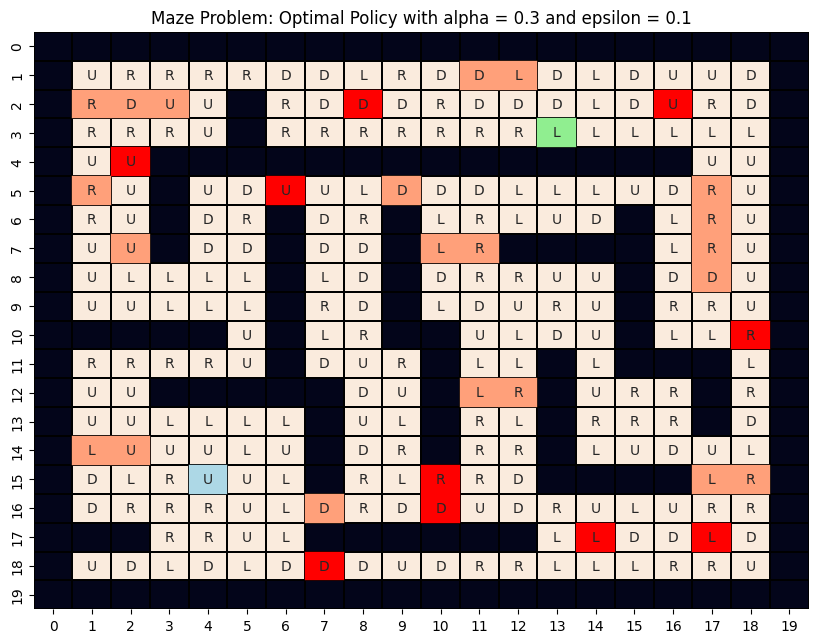

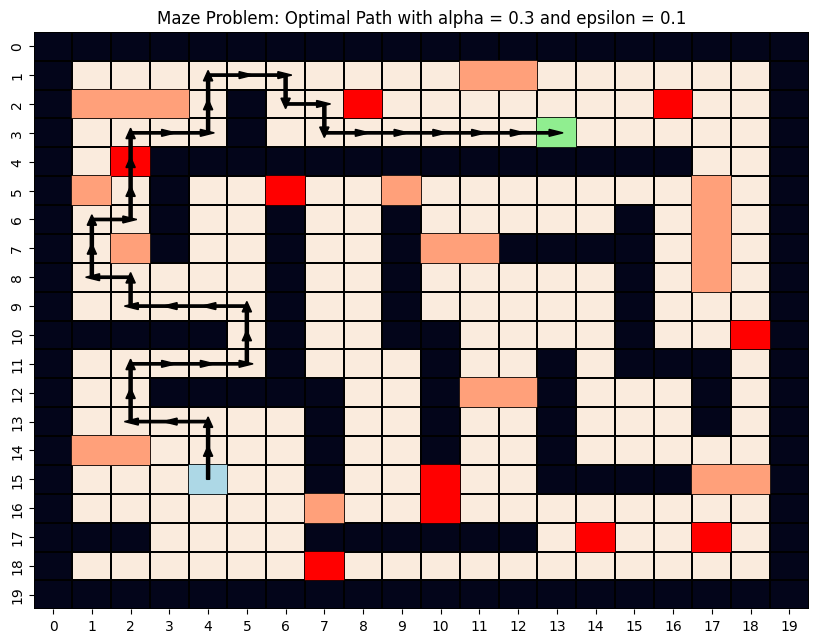

Run:  4


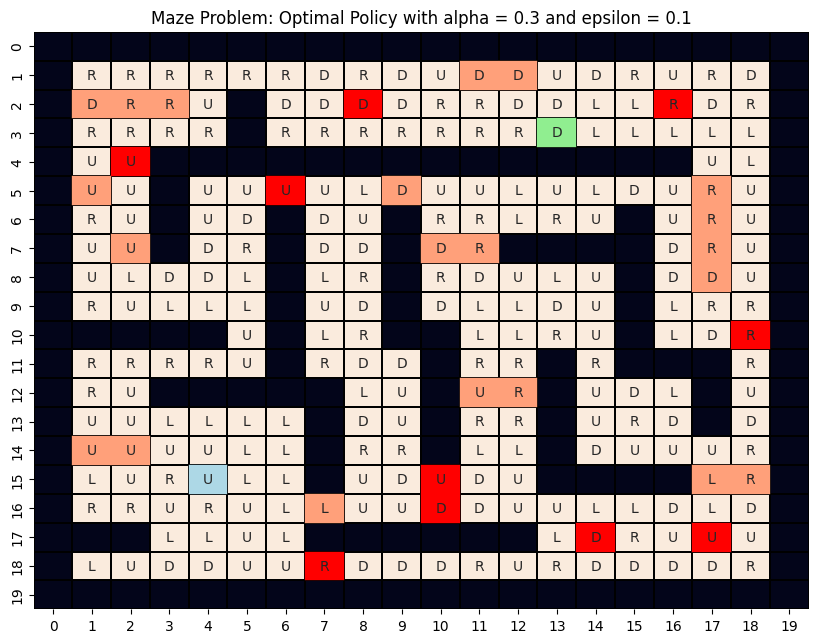

No Path Present for these specifications!
Run:  5


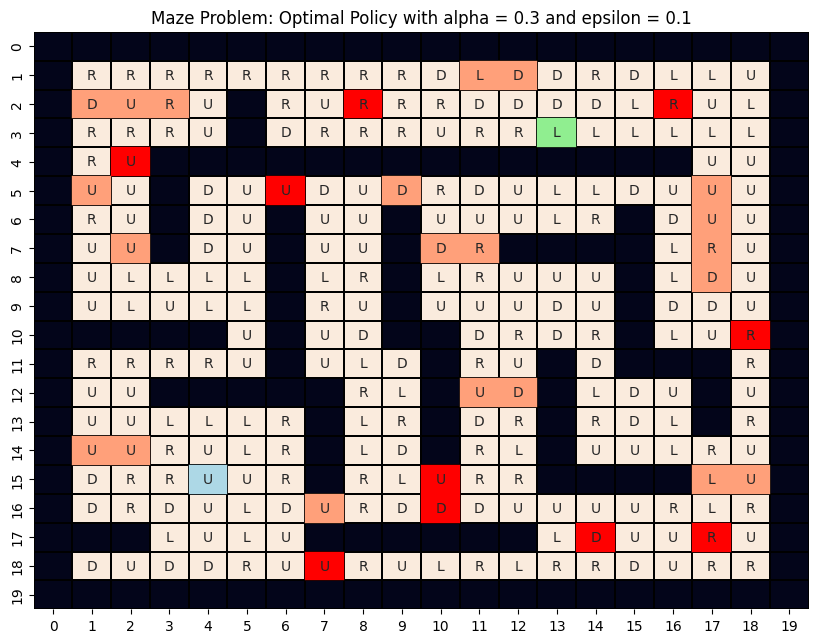

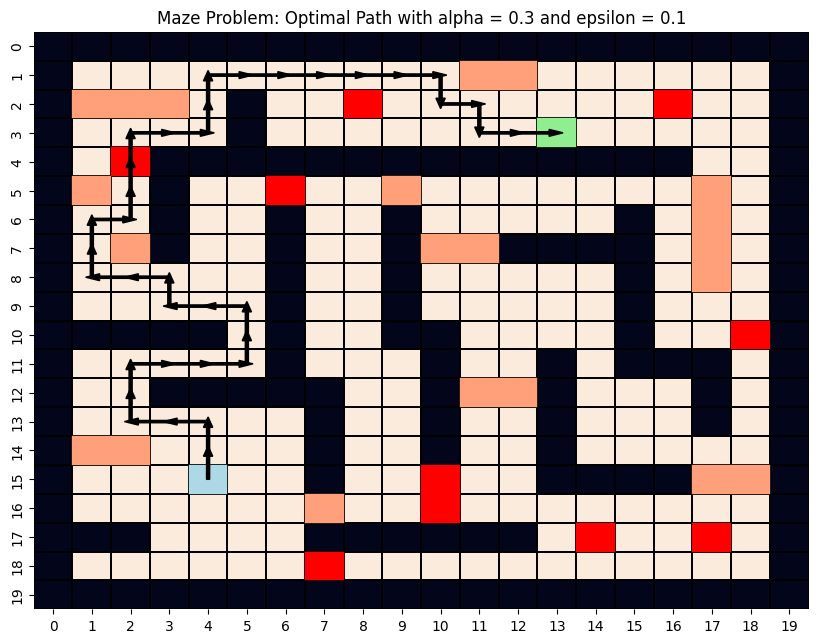

Run:  6


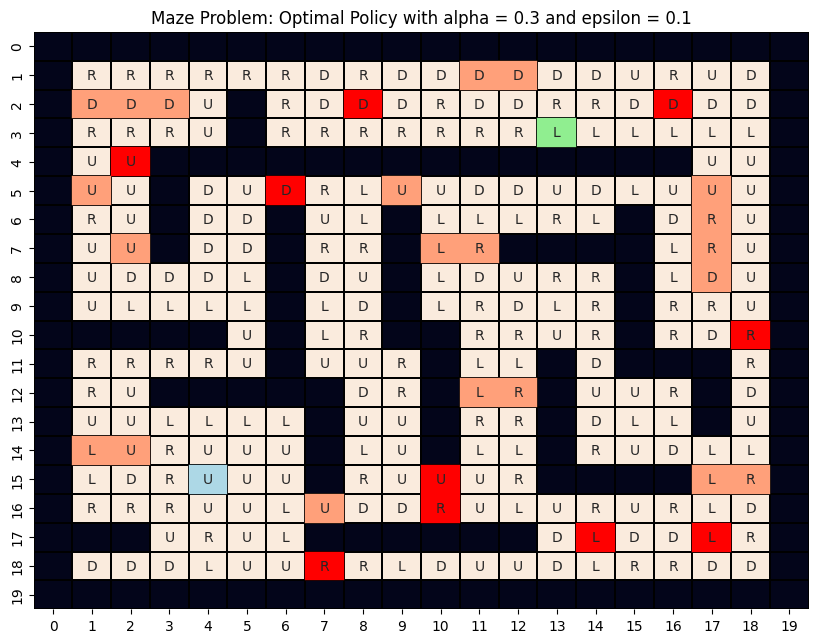

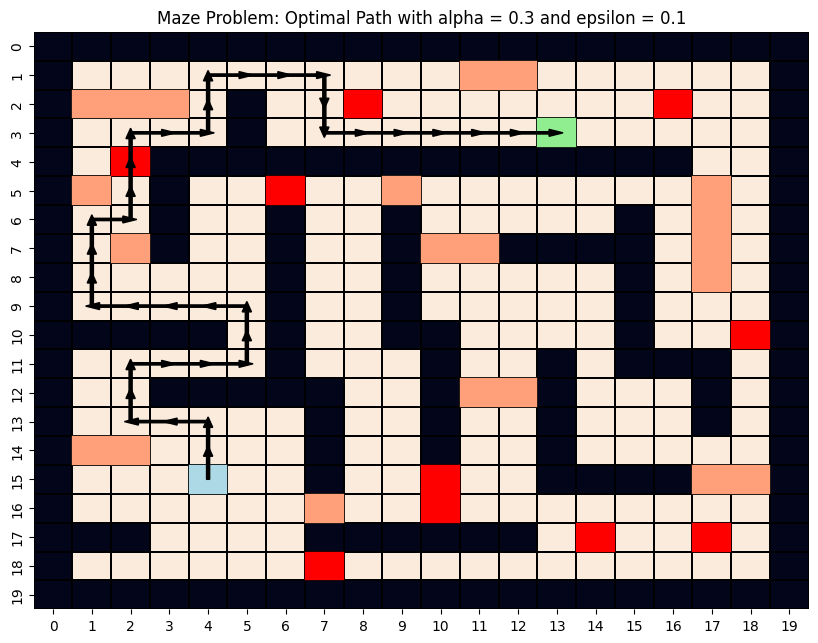

Run:  7


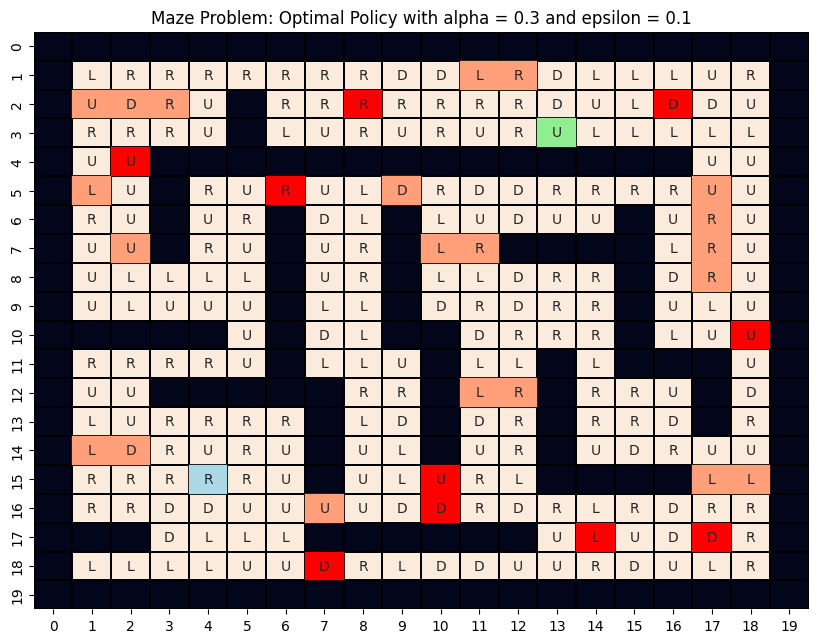

No Path Present for these specifications!
Run:  8


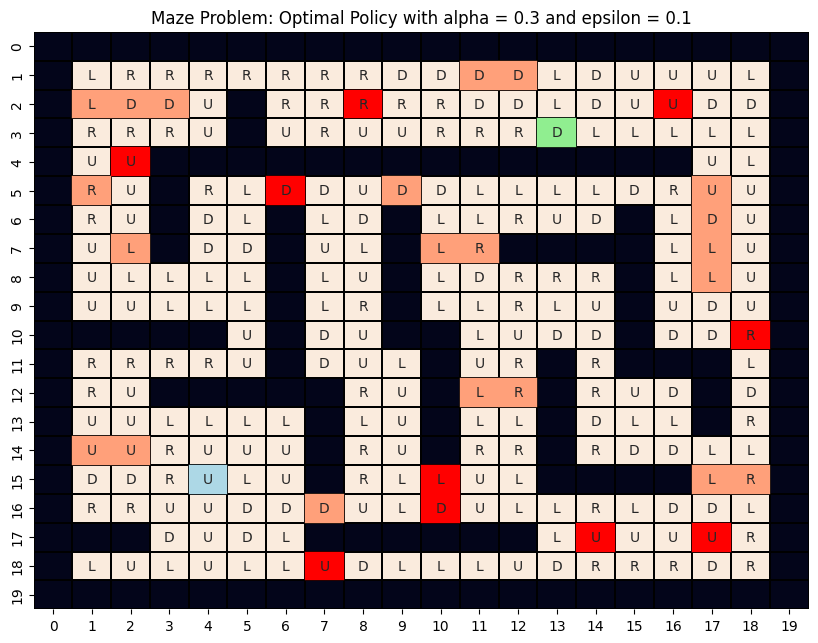

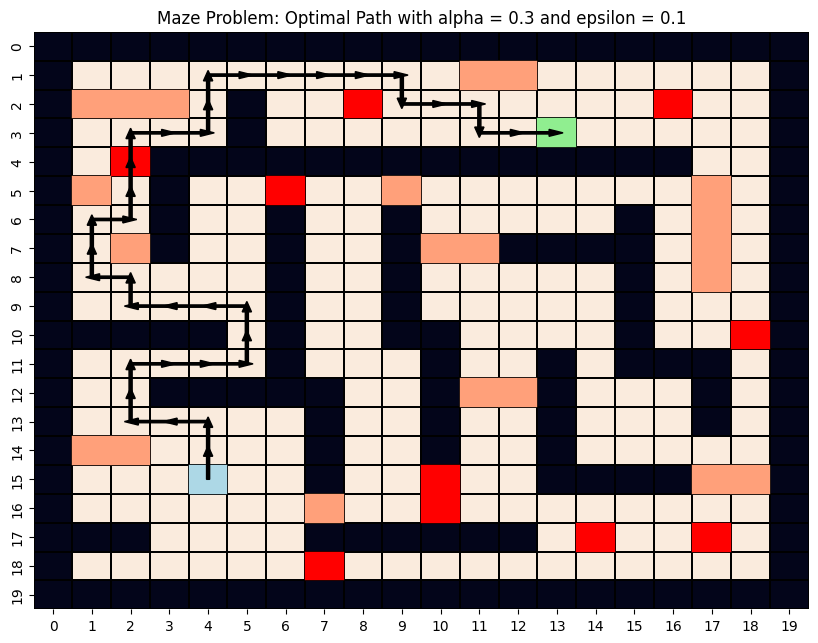

Run:  9


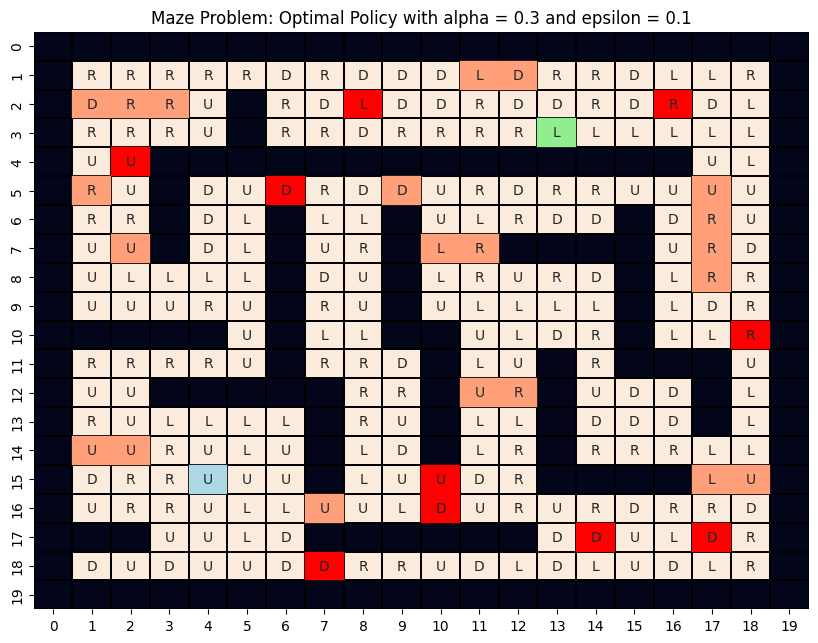

No Path Present for these specifications!
Run:  10


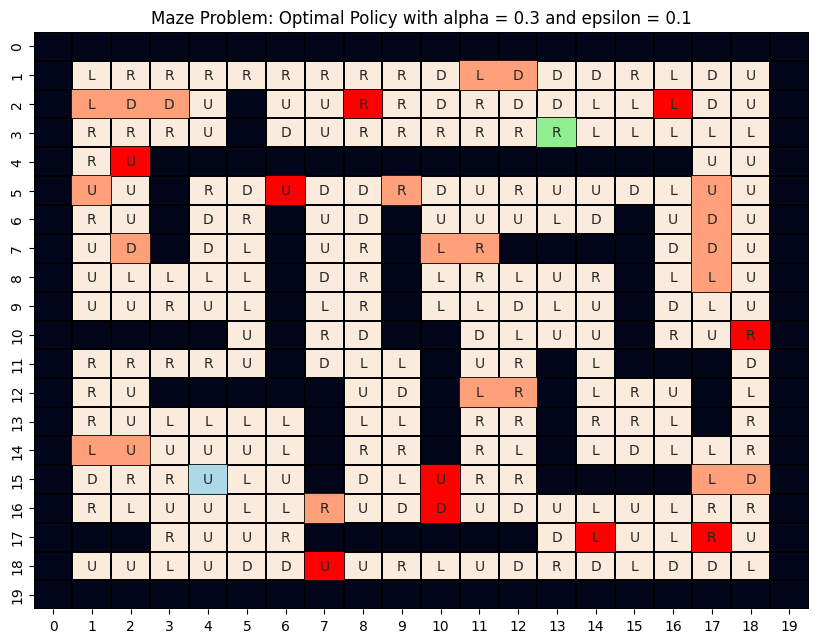

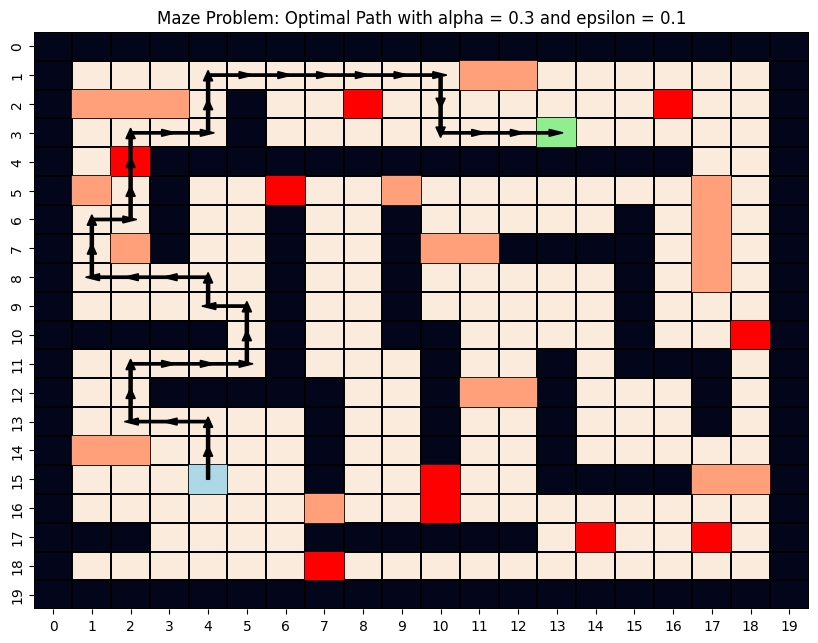

In [21]:
Q = np.zeros((18,18,num_actions))
R = np.zeros((num_runs,num_episodes))

maze_policies = np.zeros((18,18))  #Left 0 / Up 1 / Right 2 / Down 3

start = [14,3]
end = [2,12]

for run in range(num_runs):

    Q = np.zeros((18,18,num_actions))
    maze_policies = np.zeros((18,18))

    for episode in range(num_episodes):

        current_state = start
        action = choose_action(Q,current_state)
        episode_reward = 0

        #total_reward = 0
        step = 0

        for step in range(episode_length):

            reward , next_state = get_next_state(current_state,action,p)

            episode_reward += reward

            next_action = choose_action(Q,next_state)

            Q[current_state[0],current_state[1],action] +=  alpha * (reward + (gamma * Q[next_state[0],next_state[1],next_action])
                                                            - Q[current_state[0],current_state[1],action])

            if (next_state[0] == end[0]) and (next_state[1] == end[1]):
              break

            current_state = next_state
            action = choose_action(Q,current_state)

        #total_reward += episode_reward
        R[run,episode] =  episode_reward/(step+1)

    maze_policies = get_policy(Q)

    print('Run: ',run+1)
    policy_plot(maze_policies,alpha,epsilon)
    try:
      Get_path(maze_policies,alpha,epsilon)
    except:
      print('No Path Present for these specifications!')

print()

R_final_SARSA = reward_array(R)

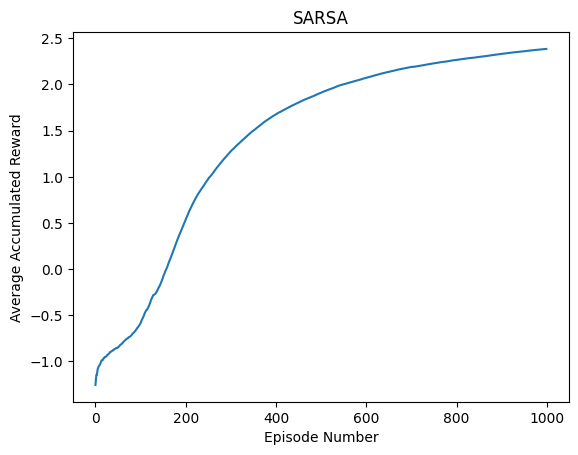

In [22]:
#Output Graph
plt.plot(range(num_episodes),R_final_SARSA)
plt.ylabel('Average Accumulated Reward')
plt.xlabel('Episode Number')
plt.title('SARSA')
plt.show()

# Actor Critic

In [23]:
def get_e_values(arr):

  sum = math.exp(arr[0]) + math.exp(arr[1]) + math.exp(arr[2]) + math.exp(arr[3])

  x1 = math.exp(arr[0])/sum
  x2 = math.exp(arr[1])/sum
  x3 = math.exp(arr[2])/sum
  x4 = math.exp(arr[3])/sum

  preferences = np.array([x1,x2,x3,x4])
  return preferences

In [24]:
def choose_action_AC(Q,current_state):

    temp = Q[current_state[0],current_state[1]]
    e_values = get_e_values(temp)

    zz = random.random()
    if zz < epsilon:
        action = np.random.randint(num_actions)

    else:
      if len(np.unique(e_values)) == 4:
        action = np.argmax(e_values)
      else:
        tt = np.where(e_values == np.amax(e_values))[0]
        action = random.choice(tt)

    return action

In [25]:
def Pi(H,action,state):

  temp = get_e_values(H[current_state[0],current_state[1]])

  return temp[action]

In [26]:
def calc_Pi(H,current_state,current_action):
  num_ = H[current_state[0],current_state[1],current_action]
  num = math.exp(num_)

  sum1 = math.exp(H[current_state[0],current_state[1],0]) + math.exp(H[current_state[0],current_state[1],1])
  sum2 = math.exp(H[current_state[0],current_state[1],2]) + math.exp(H[current_state[0],current_state[1],3])

  sum = sum1 + sum2

  return (num/sum)

In [27]:
def calc_prob(arr):
  sum = math.exp(arr[0]) + math.exp(arr[1]) + math.exp(arr[2]) + math.exp(arr[3])

  x1 = math.exp(arr[0])/sum
  x2 = math.exp(arr[1])/sum
  x3 = math.exp(arr[2])/sum
  x4 = math.exp(arr[3])/sum

  preferences = np.array([x1,x2,x3,x4])
  return preferences

Run:  1


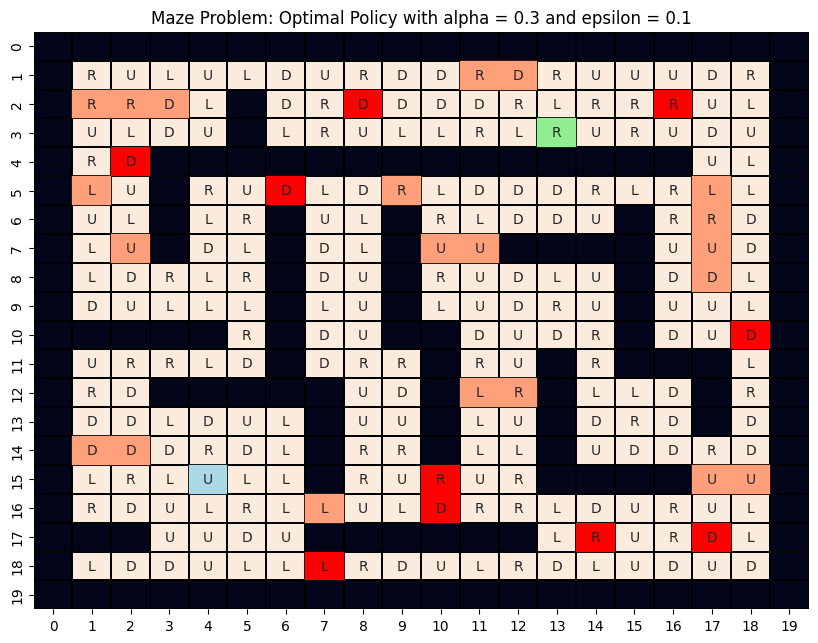

No Path Present for these specifications!
Run:  2


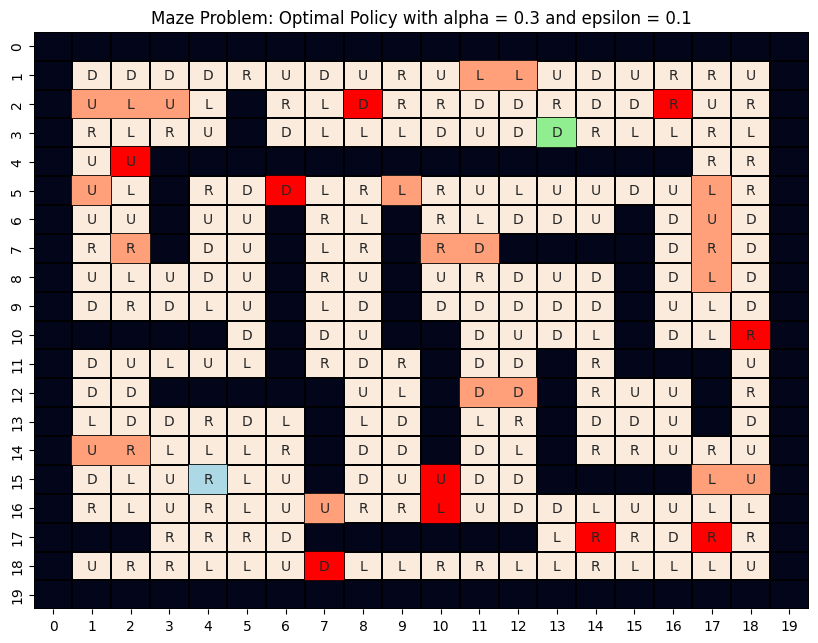

No Path Present for these specifications!
Run:  3


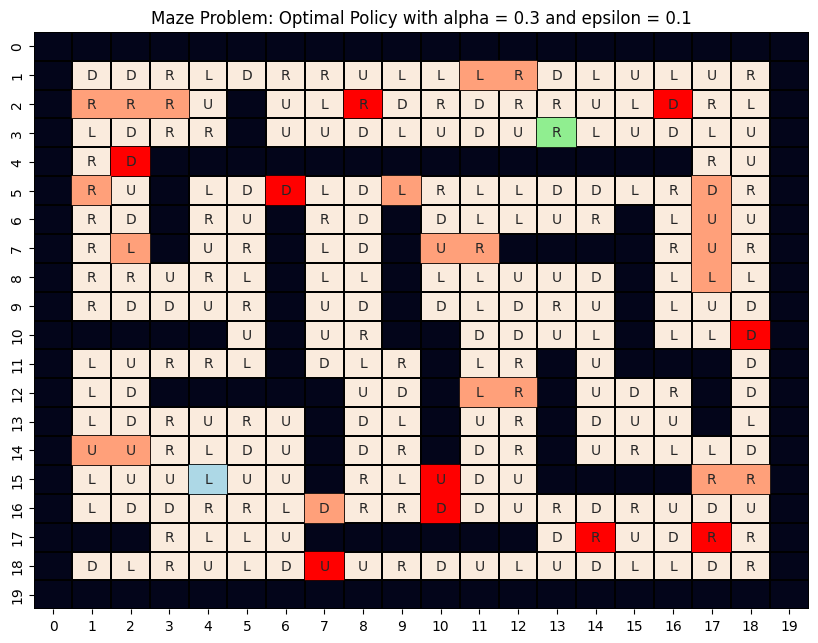

No Path Present for these specifications!
Run:  4


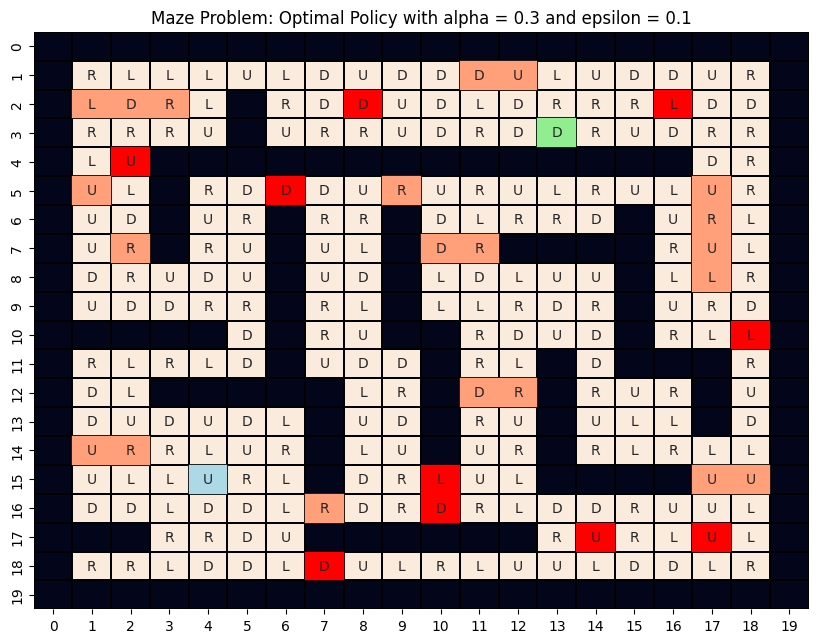

No Path Present for these specifications!
Run:  5


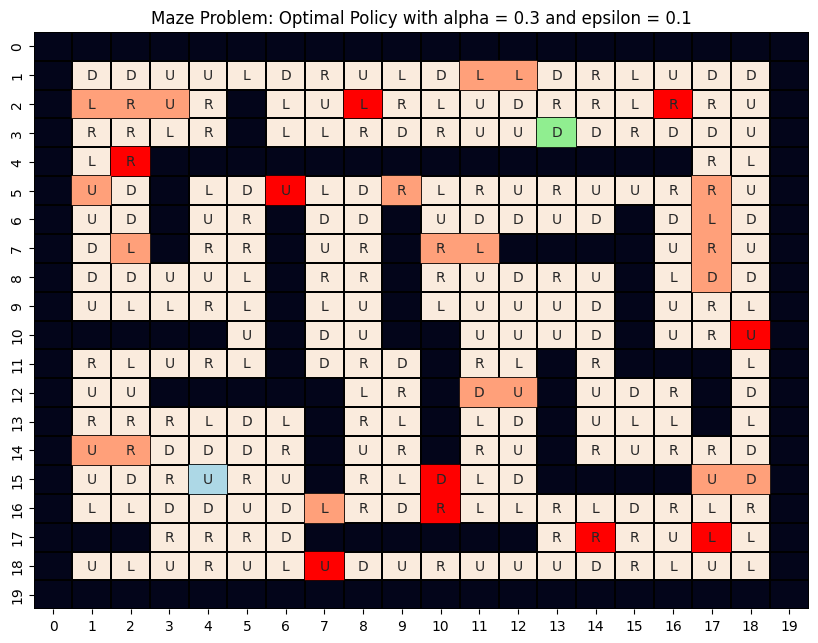

No Path Present for these specifications!
Run:  6


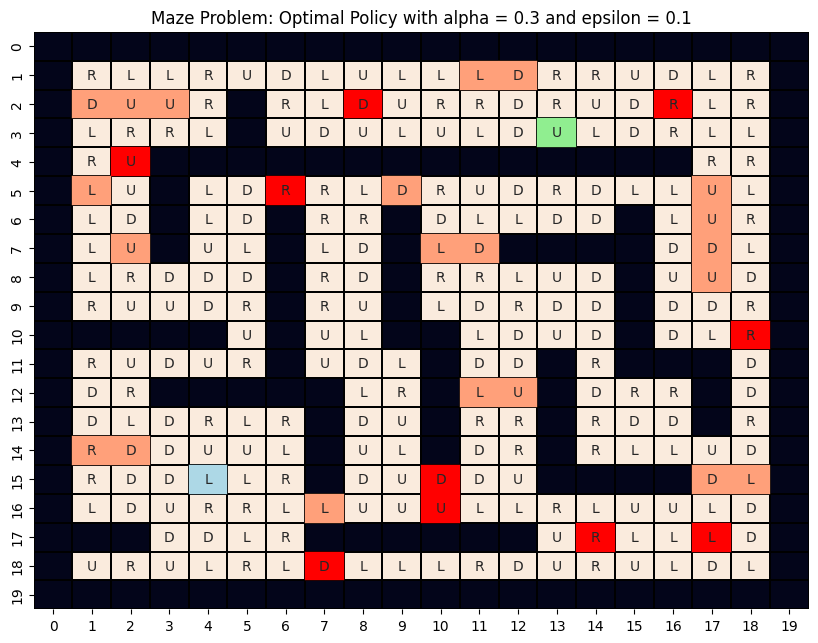

No Path Present for these specifications!
Run:  7


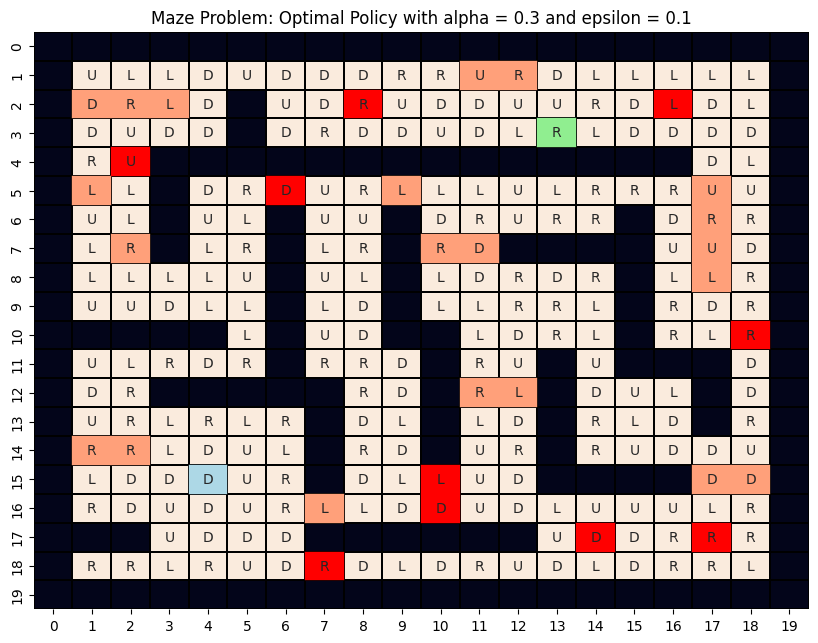

No Path Present for these specifications!
Run:  8


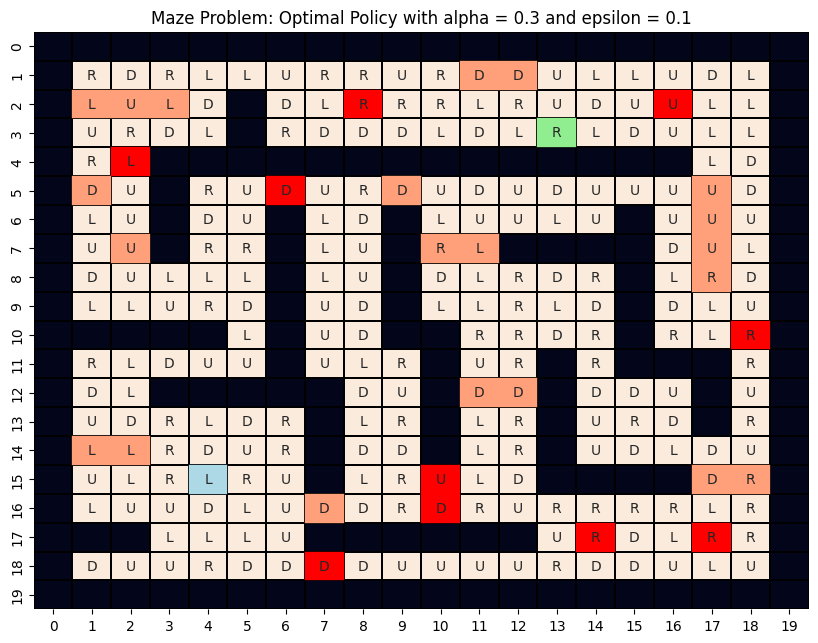

No Path Present for these specifications!
Run:  9


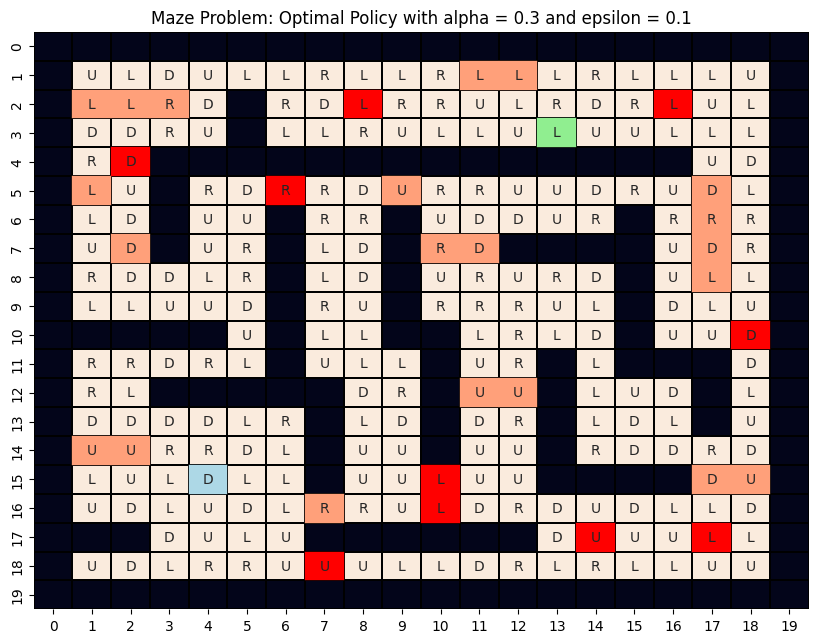

No Path Present for these specifications!
Run:  10


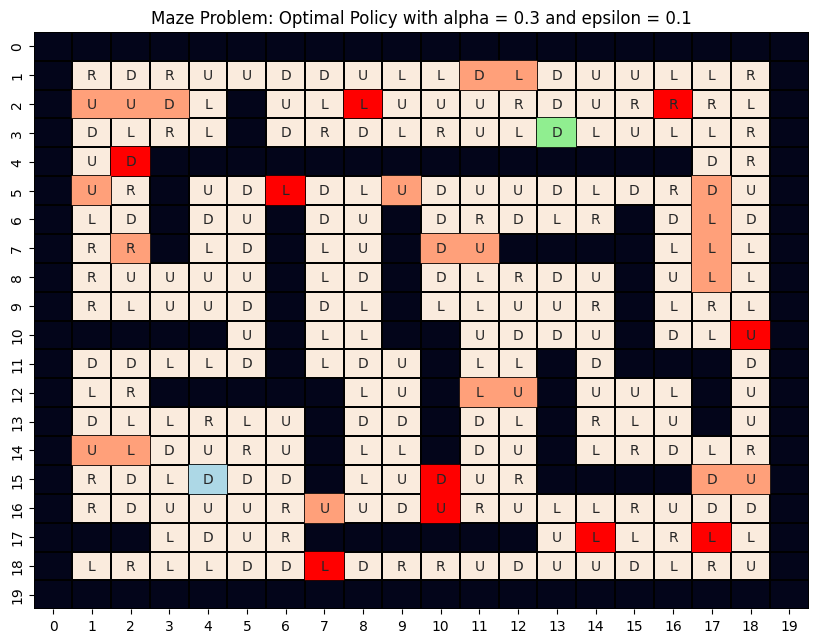

No Path Present for these specifications!


In [28]:
H = np.zeros((18,18,num_actions))
R = np.zeros((num_runs,num_episodes))
V = np.zeros((18,18))
beta = 0.01  #0.001 , play with alpha, increase episode length
gamma = 0.99 #Keep it the same or 0.95

Pi = np.zeros((18,18,num_actions))  #Left 0 / Up 1 / Right 2 / Down 3

start = [14,3]
end = [2,12]

for run in range(num_runs):

    H = np.zeros((18,18,num_actions))
    Pi = np.zeros((18,18,num_actions))
    V = np.zeros((18,18))

    for episode in range(num_episodes):

        current_state = start
        episode_reward = 0
        step = 0

        for step in range(episode_length):

            delta = 0

            current_action = np.random.choice(num_actions, p = calc_prob(H[current_state[0],current_state[1]]))
            reward , next_state = get_next_state(current_state,current_action,p)

            episode_reward += reward

            delta = reward + gamma * V[next_state[0],next_state[1]] - V[current_state[0],current_state[1]]

            V[current_state[0],current_state[1]] += alpha*delta

            temp = calc_Pi(H,current_state,current_action)

            H[current_state[0],current_state[1],current_action] += (beta*delta)*(1 - temp)

            Pi[current_state[0],current_state[1]] = temp

            if (next_state[0] == end[0]) and (next_state[1] == end[1]):
              break

            current_state = next_state

        R[run,episode] = episode_reward/(step+1)

    maze_policies = get_policy(Pi)

    print('Run: ',run+1)
    policy_plot(maze_policies,alpha,epsilon)

    try:
      Get_path(maze_policies,alpha,epsilon)
    except:
      print('No Path Present for these specifications!')

R_final_AC = reward_array(R)

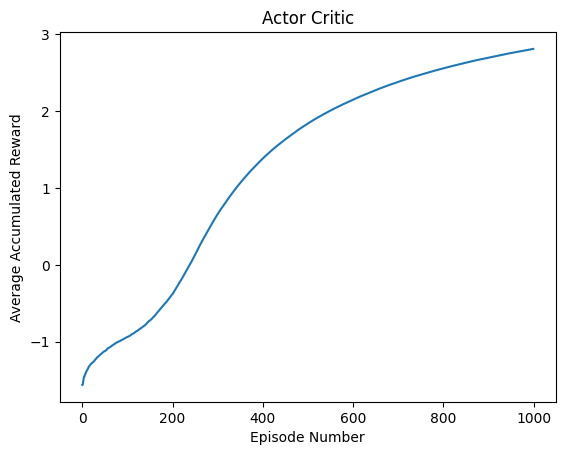

In [29]:
#Output Graph
plt.plot(range(num_episodes),R_final_AC)
plt.ylabel('Average Accumulated Reward')
plt.xlabel('Episode Number')
plt.title('Actor Critic')
plt.show()

Comparision of Graphs

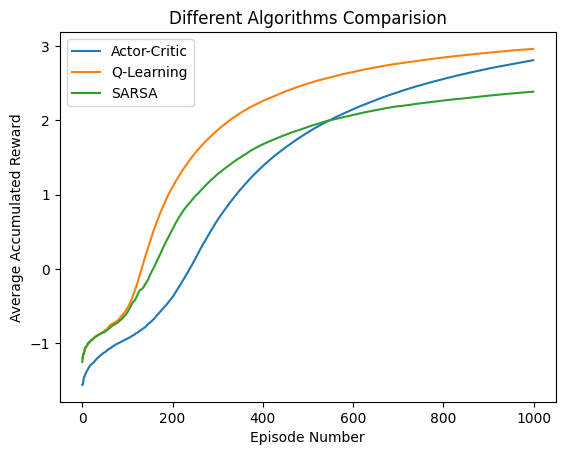

In [30]:
plt.plot(range(num_episodes),R_final_AC)
plt.plot(range(num_episodes),R_final_QLearning)
plt.plot(range(num_episodes),R_final_SARSA)

plt.ylabel('Average Accumulated Reward')
plt.xlabel('Episode Number')
plt.title('Different Algorithms Comparision')
plt.legend(["Actor-Critic", "Q-Learning", "SARSA"])
plt.show()